# Импорт необходимых модулей

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Описание данных

In [9]:
df = pd.read_csv('/content/car_price_prediction.csv')

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


**ID**: Уникальный идентификатор автомобиля (целочисленный тип).

**Price**: Цена автомобиля (целочисленный тип).

**Levy**: Налог или сбор (строковый тип, может содержать числовые значения, но представлен как строка).

**Manufacturer**: Производитель автомобиля (строковый тип).

**Model**: Модель автомобиля (строковый тип).

**Prod. year**: Год производства автомобиля (целочисленный тип).

**Category**: Категория транспортного средства (строковый тип).

**Leather interior**: Наличие кожаного салона (строковый тип, обычно да/нет).

**Fuel type**: Тип топлива (строковый тип).

**Engine volume**: Объем двигателя, иногда включает информацию о турбонаддуве
(строковый тип, может включать числа и слова).

**Mileage**: Пробег автомобиля (строковый тип, содержит числовые значения и слова, например, "km").

**Cylinders**: Количество цилиндров (вещественный тип).

**Gear box type**: Тип коробки передач (строковый тип).

**Drive wheels**: Тип привода (строковый тип, например, передний, задний или полный).

**Doors**: Количество дверей (строковый тип, например, "02-Mar" или "04-May").

**Wheel**: Тип рулевого колеса (строковый тип, левостороннее или правостороннее).

**Color**: Цвет автомобиля (строковый тип).

**Airbags**: Количество подушек безопасности (целочисленный тип).

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Пропущенные значения отсутствуют**

In [25]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags,Car_Age
count,1.816400e+04,18164.000000,18164.000000,18164.000000,18164.000000,18164.000000
mean,4.558249e+07,14024.917860,2010.655362,4.548503,6.585664,13.344638
std,9.168387e+05,11377.779677,5.624060,1.158246,4.323290,5.624060
min,2.074688e+07,1.000000,1939.000000,1.000000,0.000000,4.000000
25%,4.569699e+07,4861.000000,2009.000000,4.000000,4.000000,10.000000
50%,4.577244e+07,12231.000000,2012.000000,4.000000,6.000000,12.000000
75%,4.580175e+07,20071.000000,2014.000000,4.000000,12.000000,15.000000
max,4.581665e+07,47120.000000,2020.000000,16.000000,16.000000,85.000000


# Анализ данных и визуализация

**Преобразование 'Mileage' в числовой формат, в км**

In [26]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)

**Преобразование 'Engine volume' в числовой формат, убираем 'Turbo' если есть и конвертируем в float**

In [27]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)

**Удаление выбросов для 'Price' и 'Engine volume' через IQR**

In [28]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Engine volume')

**Гистограмма цен**

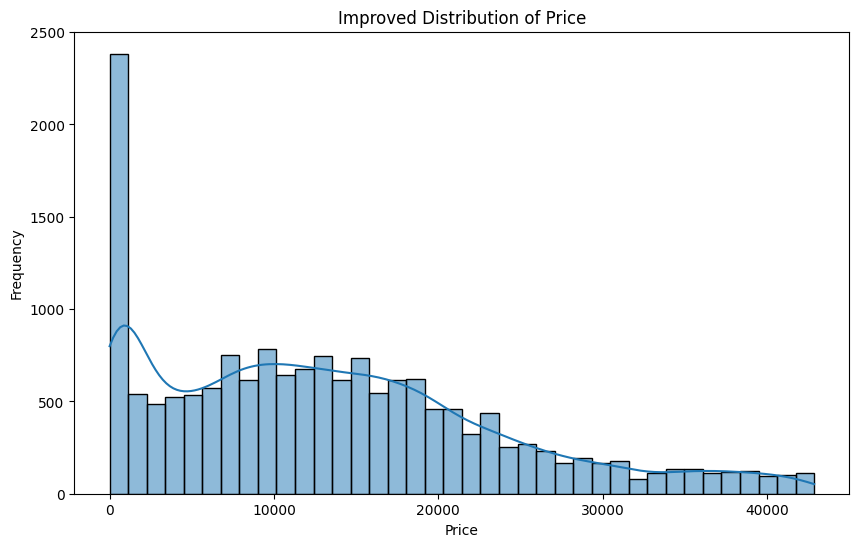

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Improved Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('2.png')
plt.show()

Гистограмма показывает, что большинство автомобилей имеют **цену в пределах примерно 10,000**. Это указывает на то, что датасет в основном состоит из более доступных автомобилей.

Имеется длинный правый хвост, что говорит о наличии **нескольких очень дорогих автомобилей**.

**Гистограмма года производства автомобилей**

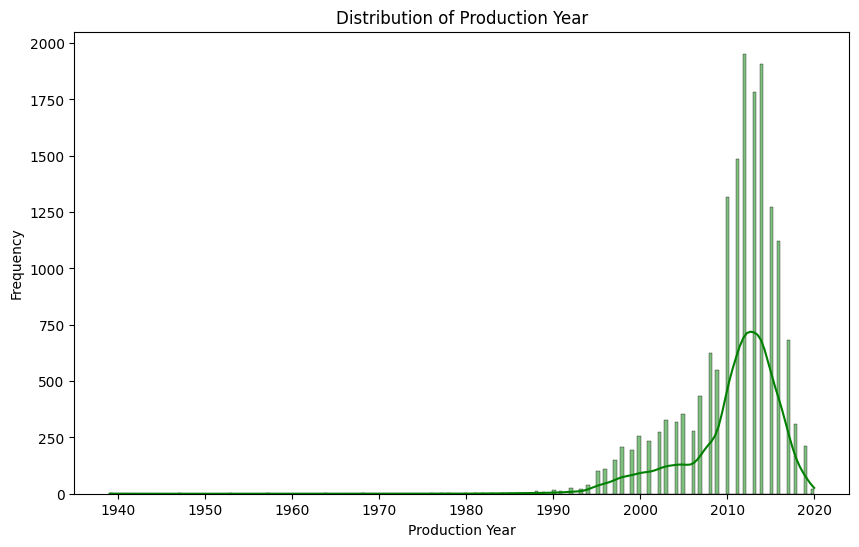

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Prod. year'], color='green', kde=True)
plt.title('Distribution of Production Year')
plt.xlabel('Production Year')
plt.ylabel('Frequency')
plt.savefig('3.png')

plt.show()

Пик распределения приходится на **последние годы**, что может свидетельствовать о том, что **большинство автомобилей в базе — относительно новые**.

Минимальное количество автомобилей производилось в **середине и начале 20 века**.

**Гистограмма количества цилиндров**

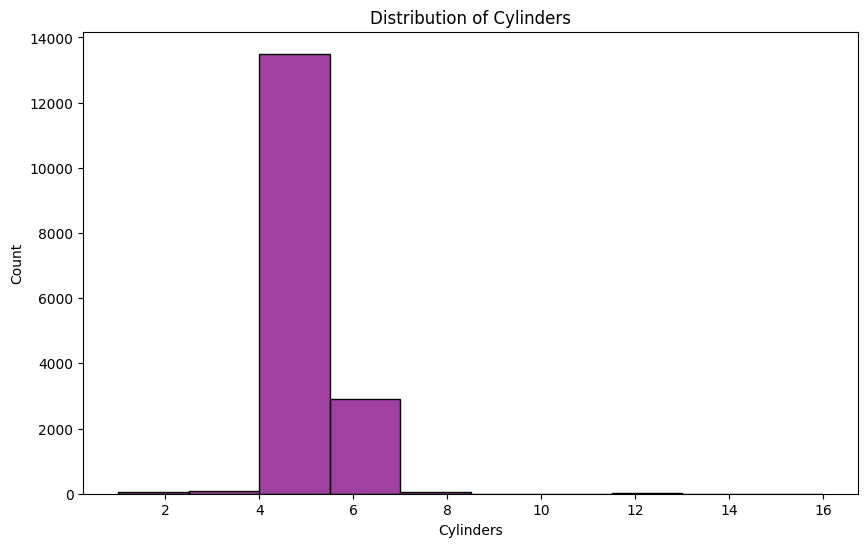

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cylinders'], bins=10, color='purple', kde=False)
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.savefig('4.png')

plt.show()

Подавляющее большинство автомобилей имеют **4 или 6 цилиндров**, что является стандартом для современных легковых и некоторых коммерческих автомобилей.

**Гистограмма количества подушек безопасности**

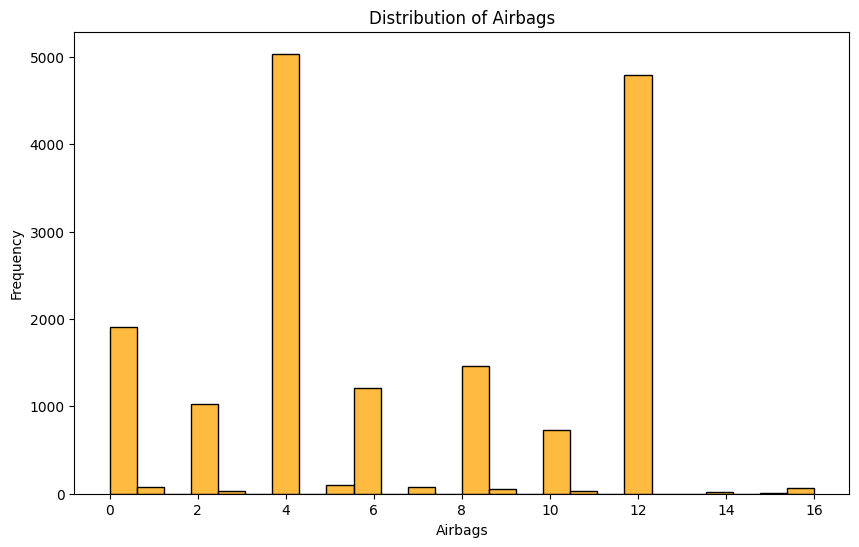

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Airbags'], color='orange', kde=False)
plt.title('Distribution of Airbags')
plt.xlabel('Airbags')
plt.ylabel('Frequency')
plt.savefig('5.png')

plt.show()

Большая часть автомобилей оборудована **4, 8 или 12 подушками безопасности**, что указывает на высокий уровень безопасности современных автомобилей.

**Скаттерплоты цены от различных показателей**

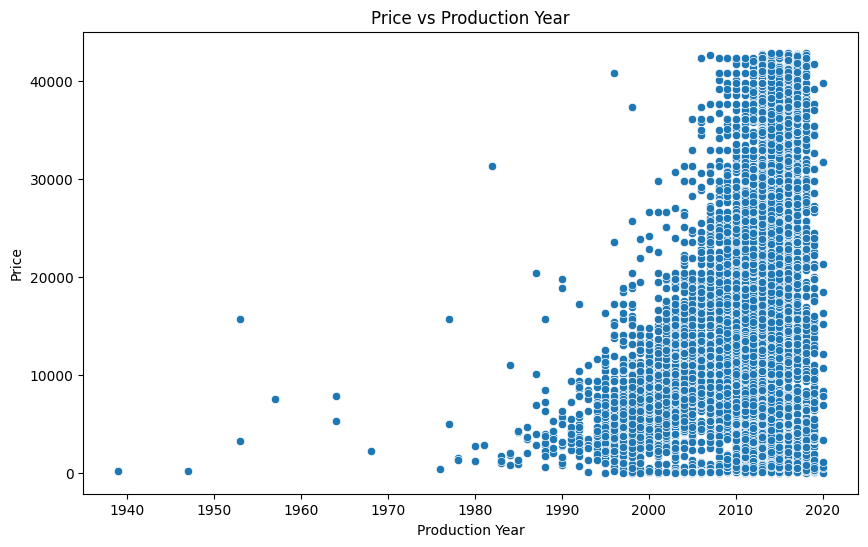

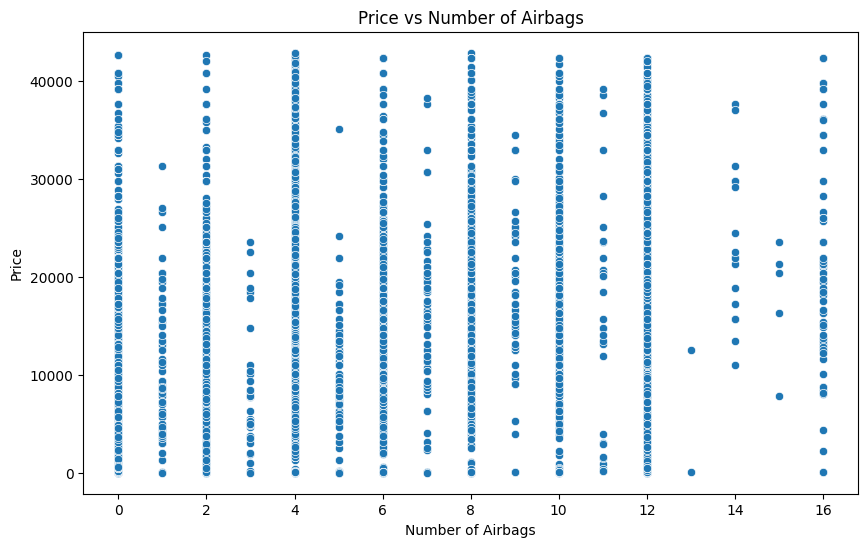

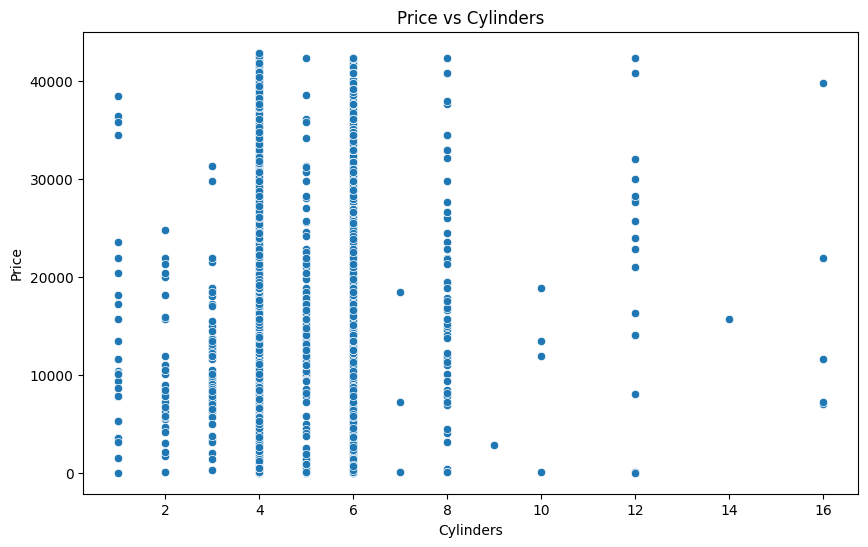

In [33]:
# Скаттерплот цены от года производства
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prod. year', y='Price', data=df)
plt.title('Price vs Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()

# Скаттерплот цены от количества подушек безопасности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Airbags', y='Price', data=df)
plt.title('Price vs Number of Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Price')
plt.show()

# Скаттерплот цены от количества цилиндров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cylinders', y='Price', data=df)
plt.title('Price vs Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()


**Цена от года производства (Price vs Production Year):**

Цены на автомобили, как правило, выше для более новых моделей, что ожидаемо из-за улучшений в технологиях и безопасности.

**Цена от количества подушек безопасности (Price vs Number of Airbags):**

Цена возрастает с увеличением числа подушек безопасности, особенно заметно это для автомобилей с **6, 8 и 12 подушками**. Это может указывать на то, что более дорогие и более безопасные автомобили имеют больше подушек безопасности.

**Цена от количества цилиндров (Price vs Cylinders):**

Высокая цена чаще встречается у автомобилей с **большим количеством цилиндров**, что может свидетельствовать о более мощных и дорогих двигателях.

**Построение корреляционной матрицы**

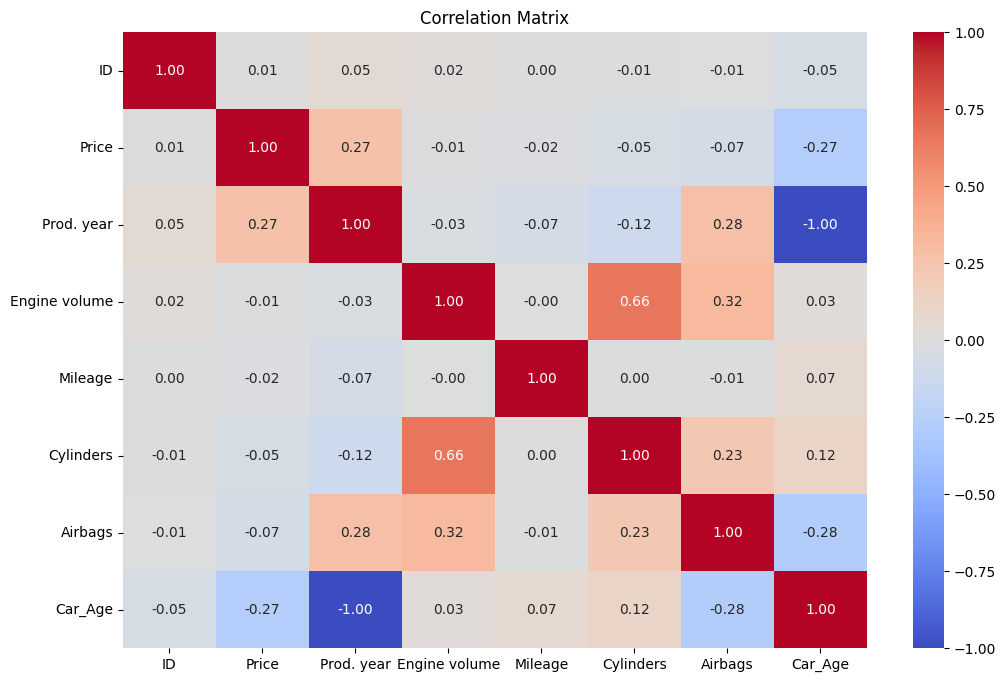

In [48]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('1.png')
plt.show()

**Ключевые корреляции**

**Цена и Год производства (Price vs Prod. year):**

Коэффициент корреляции составляет 0.29, указывая на умеренно положительную связь. Это означает, что с увеличением года производства автомобиля, склонность к увеличению цены также растет. Новые автомобили, как правило, стоят дороже старых.

**Цена и Количество подушек безопасности (Price vs Airbags):**

Коэффициент корреляции составляет 0.27, что также является умеренной положительной корреляцией. Это указывает на то, что автомобили с большим количеством подушек безопасности часто более дорогие, что может быть связано с более высоким уровнем безопасности и технологической оснащенности.

**Количество цилиндров и Количество подушек безопасности (Cylinders vs Airbags):**

Коэффициент корреляции 0.23 указывает на слабую положительную связь между этими переменными. Это может означать, что более мощные автомобили с большим количеством цилиндров также оснащены большим количеством подушек безопасности.

**Пробег и Количество подушек безопасности (Mileage vs Airbags):**

Корреляция -0.07 является очень слабой отрицательной. Это может указывать на незначительную тенденцию к тому, что у более старых автомобилей с большим пробегом меньше подушек безопасности, что может отражать изменения в стандартах безопасности с течением времени.

**Выводы**

Более новые и технологически оснащенные автомобили стоят дороже. Это подтверждается корреляциями между годом производства, количеством подушек безопасности и ценой.

Технические характеристики, такие как количество цилиндров, слабо связаны с другими факторами безопасности и ценой, что может указывать на разнообразие моделей автомобилей в разных ценовых сегментах.

# Создание новых признаков


**1. Возраст автомобиля**

In [35]:
df['Car_Age'] = 2024 - df['Prod. year']

**2. Индикатор старого автомобиля**

In [36]:
df['Is_Old'] = df['Car_Age'] > 10

**3. Категория объема двигателя**

In [37]:
def engine_category(volume):
    if volume < 1.5:
        return 'Small'
    elif volume < 2.5:
        return 'Medium'
    else:
        return 'Large'

df['Engine_Category'] = df['Engine volume'].apply(engine_category)

**4. Категория пробега**

In [38]:
def mileage_category(mileage):
    if mileage < 50000:
        return 'Low'
    elif mileage < 100000:
        return 'Medium'
    else:
        return 'High'

df['Mileage_Category'] = df['Mileage'].apply(mileage_category)

**Новые переменные**

In [39]:
new_columns = ['Car_Age', 'Is_Old', 'Engine_Category', 'Mileage_Category']
df[new_columns].head(10)

,Car_Age,Is_Old,Engine_Category,Mileage_Category
0,14,True,Large,High
1,13,True,Large,High
2,18,True,Small,High
3,13,True,Large,High
4,10,False,Small,Medium
5,8,False,Medium,High
6,14,True,Medium,High
7,11,True,Medium,High
8,10,False,Large,High
9,17,True,Large,High


# **Гипотезы**



**Влияние технологической оснащенности на стоимость автомобиля:**

Исследовать, как различные технологии (например, подушки безопасности, типы топлива, новые двигатели) влияют на стоимость автомобилей.

**Эволюция автомобильного рынка:**

Анализ изменений в производстве автомобилей по годам, включая изменения в предпочтениях потребителей и производственных технологиях.

**Ценообразование на базе безопасности и производительности:**

Оценить, насколько факторы безопасности и производительности (как количество цилиндров) влияют на ценообразование в разных сегментах рынка.

# Машинное обучение

В контексте нашего  датасета, одной из интересных задач может быть **предсказание цены автомобиля (Price)**. Это позволяет как потенциальным покупателям, так и продавцам лучше ориентироваться в текущих рыночных условиях и справедливо оценивать стоимость транспортного средства. Автоматизация этого процесса может помочь автодилерам и частным лицам быстрее принимать решения о покупке или продаже автомобилей.

**Цель моделирования**

Целью моделирования является создание предиктивной модели для определения стоимости автомобиля на основе его характеристик, таких как год выпуска, объем двигателя, пробег, количество цилиндров, количество подушек безопасности и другие.

**Метрика качества**

Для измерения качества предсказательной модели можно использовать среднеквадратичную ошибку (MSE) или среднеквадратичное отклонение (RMSE), которые часто используются для регрессионных задач, поскольку они эффективно штрафуют большие ошибки и выражают ошибку в единицах измеряемой величины.

**Разбиение данных**

Для обучения и тестирования модели данные нужно разделить на обучающую и тестовую выборки. Мы планируем использовать примерно 80% данных для обучения и 20% для тестирования.

**Предобработка данных**

**Удаление или заполнение пропусков**: В нашем датасете отсутствуют пропущенные значения

**Кодирование категориальных переменных**: Использовать One-Hot-Encoding или Label Encoding для преобразования категориальных переменных в числовой формат.

**Масштабирование данных**: Применить стандартизацию или нормализацию числовых переменных для улучшения производительности некоторых моделей.

**Обучение моделей**

**Попробовать различные модели регрессии**:

Линейная регрессия

Решающие деревья

Случайный лес

Градиентный бустинг

**Анализ результатов**

Сравнить результаты различных моделей на тестовой выборке, используя выбранную метрику (MSE, RMSE).

**Выборка признаков и целевой переменной**

In [40]:
X = df.drop('Price', axis=1)
y = df['Price']

**Кодирование категориальных переменных и масштабирование числовых**

In [41]:
numeric_features = ['Mileage', 'Prod. year', 'Cylinders']
categorical_features = ['Fuel type', 'Gear box type', 'Engine_Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

**Разбиение на обучающую и тестовую выборки**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Создание и обучение модели**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Функция для обучения и оценки моделей
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        results[name] = {'MSE': mse, 'RMSE': rmse}
        print(f'{name} - MSE: {mse}, RMSE: {rmse}')
    return results

# Оценка моделей
results = evaluate_models(models, X_train, y_train, X_test, y_test)

Linear Regression - MSE: 83085455.3362394, RMSE: 9115.122343459763
Decision Tree - MSE: 81522708.39578801, RMSE: 9028.992656757897
Random Forest - MSE: 54179426.64652726, RMSE: 7360.667540823132
Gradient Boosting - MSE: 63811828.24639723, RMSE: 7988.230607988056


**Предсказание и оценка модели**

Результаты анализа данных на основе различных моделей регрессии предоставляют ценную информацию о том, насколько точно каждая модель способна предсказать цены. Важно отметить, что каждая модель имеет свои особенности, которые влияют на точность предсказаний.

**Линейная регрессия** показала MSE (среднеквадратичную ошибку) в размере 83,085,455.34 и RMSE (корень из среднеквадратичной ошибки) равное 9,115.12. Линейная регрессия - это простая модель, которая предполагает линейную зависимость между независимыми переменными и целевой переменной. Она легко интерпретируется и быстро вычисляется, однако её основное ограничение заключается в том, что она не может хорошо справляться с нелинейными зависимостями и сложными взаимодействиями между переменными. Например, если цена автомобиля сильно зависит от комбинации года выпуска и пробега, линейная регрессия может не уловить этой связи.

**Модель решающего дерева** продемонстрировала MSE в размере 81,522,708.40 и RMSE равное 9,028.99. Решающее дерево строит модель, которая разделяет данные на подгруппы на основе значений признаков, что позволяет улавливать сложные нелинейные зависимости. Тем не менее, решающие деревья склонны к переобучению, особенно при отсутствии ограничения на глубину дерева, что может привести к высокой вариативности и снижению обобщающей способности модели. В реальной жизни это можно сравнить с человеком, который делает выводы только на основе небольшого количества наблюдений и не может эффективно обобщать свои знания на новые ситуации.

**Случайный лес** продемонстрировал лучшие результаты среди всех моделей с MSE равным 54,179,426.65 и RMSE в размере 7,360.67. Случайный лес состоит из множества решающих деревьев, обученных на различных подвыборках данных, и предсказание делается путем усреднения предсказаний всех деревьев. Этот подход уменьшает проблему переобучения, характерную для одиночных решающих деревьев, и улучшает общую точность модели. В реальной жизни это можно сравнить с ситуацией, когда решение принимается коллегиально группой экспертов, а не одним человеком, что позволяет учесть больше факторов и сделать более точное предсказание.

**Градиентный бустинг** показал MSE равное 63,811,828.25 и RMSE в размере 7,988.23. Эта модель использует последовательное обучение слабых моделей (обычно решающих деревьев), каждая из которых корректирует ошибки предыдущих. Градиентный бустинг часто превосходит случайные леса в точности, но он также более подвержен переобучению и требует тщательной настройки гиперпараметров. Этот метод можно сравнить с процессом обучения, когда ученик постепенно исправляет свои ошибки, слушая советы наставников, чтобы в итоге достичь высокого уровня мастерства.

На основе полученных результатов можно сделать вывод, что случайный лес и градиентный бустинг являются наиболее точными моделями для предсказания цен, что подтверждается их более низкими значениями MSE и RMSE по сравнению с линейной регрессией и решающими деревьями. Важно отметить, что выбор модели зависит от конкретных требований и условий задачи, а также от объема и качества данных. Например, в условиях ограниченных вычислительных ресурсов или при необходимости быстрой интерпретации результатов, может быть предпочтительнее использовать линейную регрессию. Однако для задач, требующих высокой точности предсказаний и способных учитывать сложные взаимодействия между признаками, лучше подходят случайный лес или градиентный бустинг.